In [26]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [28]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [29]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.740000e+12
1,South Michelleport,3/4/19 18:24,30.24,2.340000e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.010000e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.150000e+12
4,South Jack,3/6/19 4:28,34.58,3.910000e+12
5,South Latoya,3/11/19 12:26,9.52,1.990000e+12
6,New Paulville,2/27/19 11:17,43.25,7.930000e+11
7,Simpsonburgh,4/26/19 0:43,35.98,1.120000e+11
8,South Karenland,1/8/19 3:28,35.09,8.000000e+12
9,North Jasmine,3/9/19 6:26,42.81,5.330000e+12


In [30]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [31]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [32]:
# Get the data types of each column.
city_data_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [33]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [34]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [35]:
#What are the number of data points for the Suburban and Rural cities?
sum(city_data_df["type"]=="Suburban")

36

In [36]:
#What are the number of data points for the Suburban and Rural cities?
sum(city_data_df["type"]=="Rural")

18

In [37]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city         2375
date         2375
fare         2375
 ride_id     2375
dtype: int64

In [38]:
# Get the columns and the rows that are not null
ride_data_df.isnull().sum()

city         0
date         0
fare         0
 ride_id     0
dtype: int64

In [39]:
# Get the data types of each column.
ride_data_df.dtypes

city          object
date          object
fare         float64
 ride_id     float64
dtype: object

In [40]:
# Combine the data into a single dataset
pyber_data_df= pd.merge(ride_data_df, city_data_df, how= "left", on= ["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.910000e+12,46,Urban


In [41]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.910000e+12,46,Urban


In [42]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [43]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()
urban_ride_count.head()

,date,fare,ride_id,driver_count,type
city,,,,,
Amandaburgh,18,18,18,18,18
Barajasview,22,22,22,22,22
Carriemouth,27,27,27,27,27
Christopherfurt,27,27,27,27,27
Deanville,19,19,19,19,19


In [44]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()

rural_ride_count = rural_cities_df.groupby(["city"]).count()

In [45]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [46]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [47]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [48]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

ValueError: x and y must be the same size

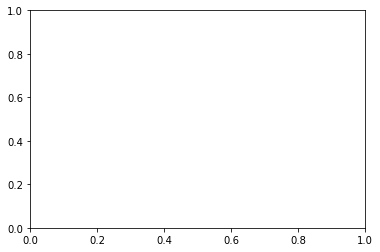

In [51]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare)


ValueError: x and y must be the same size

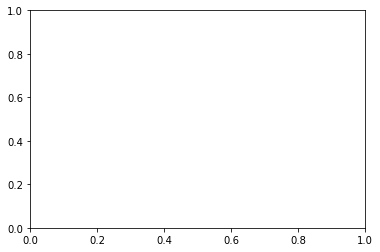

In [50]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=urban_driver_count)

ValueError: x and y must be the same size

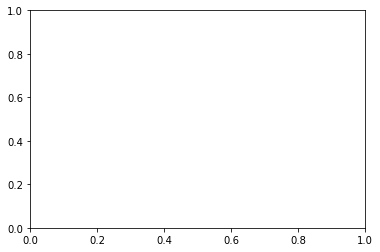

In [52]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [ ]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()


In [ ]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

ValueError: x and y must be the same size

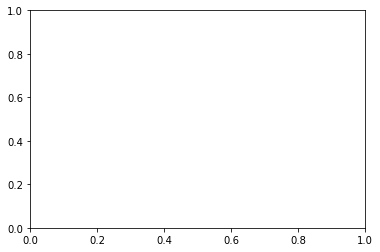

In [53]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Show the plot
plt.show()

In [ ]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot
plt.show()


In [ ]:
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

In [ ]:
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

In [ ]:
# Save the figure.
plt.savefig("analysis/Fig1.png")
